<a href="https://colab.research.google.com/github/zhangzixuan1997/Python/blob/master/MINIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this notebook, we will use CNN network to analyze [Fashion MNIST dataset](https://www.kaggle.com/zalando-research/fashionmnist)**

training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
# Display a single MNIST picture
from IPython.display import display 
single = x_train[0]
print(single.shape)
pd.set_option("display.max_columns",10)
pd.set_option("display.max_rows",10)
pd.DataFrame(single.reshape(28,28))

(28, 28)


,0,1,2,3,4,...,23,24,25,26,27
0,0,0,0,0,0,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,1,1,0
4,0,0,0,0,0,...,3,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
23,0,0,74,189,212,...,194,192,216,170,0
24,2,0,0,0,66,...,168,99,58,0,0
25,0,0,0,0,0,...,0,0,0,0,0
26,0,0,0,0,0,...,0,0,0,0,0


Image 200, digit8


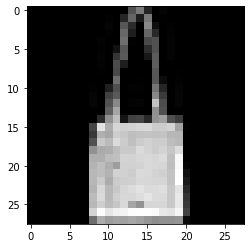

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
digit = 200
a = x_train[digit]
plt.imshow(a,cmap='gray',interpolation="nearest")
print("Image {}, digit{}".format(digit,y_train[digit])) # Looks like it is a bag?

In [0]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Dropout, Flatten # Some pic proccessing tools 
from tensorflow.keras.layers import Conv2D, MaxPooling2D #CNN 2d with Maxpool 
from tensorflow.keras import backend as K # Backend 

batch_size = 128
num_classes = 10 # 10 different genras 
epochs = 12 

img_row = 28
img_col = 28

if K.image_data_format() == "channels_first":
  x_train = x_train.reshape(x_train.shape[0],1,img_row,img_col)
  x_test = x_test.reshape(x_test.shape[0],1,img_row,img_col)
  input_shape = (1,img_row, img_col)
else:
  x_train = x_train.reshape(x_train.shape[0],img_row,img_col,1)
  x_test = x_test.reshape(x_test.shape[0],img_row,img_col,1)
  input_shape = (img_row,img_col,1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

#Convert class vectors to binary class matrix
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [0]:
# Build CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=3,activation="relu",input_shape=input_shape))
model.add(Conv2D(32, kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2)) # Drop 20% of the nodes to avoid overfitting
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5)) # Drop 50% of the nodes to avoid overfitting
model.add(Dense(num_classes,activation="relu"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [8]:
# Test our model
import tensorflow as tf
import time
import IPython
start_time = time.time()
model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, verbose=2,
          validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=0)

print("Test Loss:{}".format(score[0]))
print("Test Accuracy:{}".format(score[1]))

end_time = time.time()
elapsed_time = end_time - start_time
print("Time Duration:{}".format(elapsed_time)) 


Epoch 1/12
469/469 - 3s - loss: 0.5968 - accuracy: 0.8269 - val_loss: 0.5397 - val_accuracy: 0.8432
Epoch 2/12
469/469 - 3s - loss: 0.5731 - accuracy: 0.8382 - val_loss: 0.5006 - val_accuracy: 0.8508
Epoch 3/12
469/469 - 3s - loss: 0.6168 - accuracy: 0.8213 - val_loss: 0.5434 - val_accuracy: 0.8407
Epoch 4/12
469/469 - 3s - loss: 0.5734 - accuracy: 0.8369 - val_loss: 0.5503 - val_accuracy: 0.8536
Epoch 5/12
469/469 - 3s - loss: 0.5771 - accuracy: 0.8431 - val_loss: 0.5226 - val_accuracy: 0.8608
Epoch 6/12
469/469 - 3s - loss: 0.5727 - accuracy: 0.8392 - val_loss: 0.4705 - val_accuracy: 0.8596
Epoch 7/12
469/469 - 3s - loss: 0.5480 - accuracy: 0.8440 - val_loss: 0.4873 - val_accuracy: 0.8611
Epoch 8/12
469/469 - 3s - loss: 0.6711 - accuracy: 0.8145 - val_loss: 0.5231 - val_accuracy: 0.8533
Epoch 9/12
469/469 - 3s - loss: 0.6716 - accuracy: 0.8094 - val_loss: 0.5301 - val_accuracy: 0.8323
Epoch 10/12
469/469 - 3s - loss: 0.6706 - accuracy: 0.8174 - val_loss: 0.5222 - val_accuracy: 0.8401

In [0]:
# At last we got a accuracy score of 84.35%